<a href="https://colab.research.google.com/github/jihun0423/Object-detection/blob/main/COCO_API%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC_Dataset_%ED%83%90%EC%83%89%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb 를 참조하였음.

실행전에 cocoapi를 download 한 뒤, pycocotools 셋업 필요. cocoapi/PythonAPI로 들어간 뒤 make install 수행. keras_tensor01 가상환경의 site-packages에 로드 되는지 콘솔로 확인할 것.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/DLCV-master/data/coco

/content/gdrive/MyDrive/DLCV-master/data/coco


In [5]:
!unzip "val2017.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 ext

In [6]:
!unzip "annotations_trainval2017.zip"

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [1]:
pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


pycocotools 설치는 pip로 설치 시 오류가 발생하기 쉬우므로 conda 로 설치하거나 아예 git에서 소스코드를 다운로드 받아서 설치.

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np

1. COCO 데이터 세트는 아래에서 다운로드 가능
http://cocodataset.org/#download

2. 이중 2017년 Train과 Val image 압축파일, 2017 Train/Val annotation 압축 파일을 다운로드 함.   
2017년 Train image 파일 다운로드: wget http://images.cocodataset.org/zips/train2017.zip  
2017년 Val image 파일 다운로드: wget http://images.cocodataset.org/zips/val2017.zip  
2017년 Train/Val annoation 파일 다운로드: http://images.cocodataset.org/annotations/annotations_trainval2017.zip  

모두 압축파일이므로 ~/DLCV/data/coco 디렉토리 밑에 다운로드 받은 후 unzip으로 압축 풀기.


### COCO API를 활용하기 위해 annotation 파일을 COCO 객체로 로드하기

In [7]:
dataDir='/content/gdrive/MyDrive/DLCV-master/data/coco'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [8]:
# annotation 파일을 COCO객체로 로드하면 다양한 COCO객체의 API들을 이용하여 COCO DATASET 활용 가능
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.14s)
creating index...
index created!


#### Cagory 정보를 가져 오기

In [9]:
# getCatIds()는 COCO Dataset의 category id를 리스트로 반환
print(coco.getCatIds())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


In [10]:
# loadCats()는 category id 리스트를 입력받아 category들에 대한 세부 정보를 여러개의 딕셔너리를 개별 원소를 가지는 리스트로 반환
cats = coco.loadCats(coco.getCatIds())
cats

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [11]:
# display COCO categories and supercategories
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
furniture sports food kitchen accessory electronic indoor vehicle person outdoor appliance animal


### 지정된 이미지를 데이터 세트에서 로드하기

In [12]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds );
print(imgIds)

[1, 18, 41]
[549220, 324158, 279278]


In [13]:
#loadImgs()는 인자로 들어온 image id에 대한 메타 정보를 딕셔너리를 개별 원소로 가지는 리스트로 반환
img = coco.loadImgs(324158)
print(img)

# 전체 리스트는 필요 없고 내부 딕셔너리만 필요하므로 [0]으로 내부 딕셔너리 추출
print("\n내부 딕셔너리 파일 메타정보 추출")
img = coco.loadImgs(324158)[0]
print(img)

[{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}]

내부 딕셔너리 파일 메타정보 추출
{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


#### 이미지 파일 위치를 수동으로 지정해 주고, 이미지 시각화

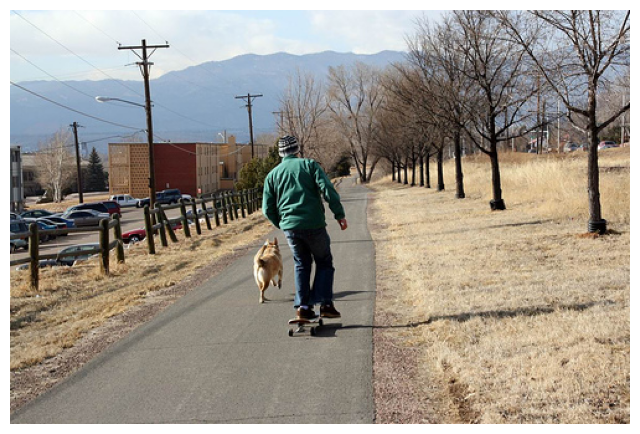

In [14]:
import cv2
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

img_file_path = '{}/val2017/{}'.format(dataDir,img['file_name'])

image_array = cv2.imread(img_file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 10))
plt.axis('off')
plt.imshow(image_array)
plt.show()

### Instance Segmentation 시각화

In [ ]:
# 해당 image의 annotation을 가져오기 위해서 getAnnIds() 를 이용함. 인자로 image의 id(파일명이 아님)와 category id를 입력
# 하나의 image는 segmentation별로 여러개의 annotation을 가질 수 있음
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds

[10673, 638724, 2162813]

In [ ]:
# loadAnns()에 annotation id를 리스트로 입력하면 annotation 정보들을 반환함.
anns = coco.loadAnns(annIds)
anns

[{'segmentation': [[216.7,
    211.89,
    216.16,
    217.81,
    215.89,
    220.77,
    215.89,
    223.73,
    217.77,
    225.35,
    219.12,
    224.54,
    219.12,
    220.5,
    219.66,
    217.27,
    219.93,
    212.7,
    220.46,
    207.85,
    219.66,
    203.01,
    218.85,
    198.43,
    217.77,
    195.74,
    216.7,
    194.93,
    215.62,
    190.62,
    215.62,
    186.59,
    214.27,
    183.89,
    211.85,
    184.16,
    211.85,
    187.66,
    210.24,
    187.66,
    209.16,
    184.97,
    207.81,
    183.36,
    205.12,
    186.59,
    205.12,
    189.28,
    201.08,
    192.78,
    199.74,
    195.2,
    196.78,
    200.04,
    196.51,
    203.01,
    198.12,
    205.43,
    197.32,
    209.2,
    196.78,
    213.23,
    197.05,
    218.89,
    199.74,
    221.85,
    201.62,
    225.35,
    201.62,
    233.69,
    201.08,
    236.11,
    202.97,
    236.38,
    204.85,
    236.11,
    204.58,
    232.34,
    203.78,
    228.85,
    205.39,
    233.15,
    20

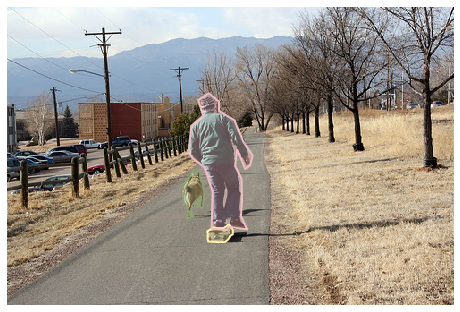

In [ ]:
# showAnns( )는 annotation 정보들을 입력 받아서 Visualization 시켜줌. 단 먼저 matplotlib 객체로 원본 이미지가 먼저 로드되어 있어야 함.
plt.figure(figsize=(8, 10));plt.imshow(image_array); plt.axis('off')
coco.showAnns(anns)

### bounding box 그리기는 COCOAPI에서 지원하지 않아서 CUSTOMIZE함.

In [ ]:
# bounding box를 그리기 위해 x, y 좌표를 segmentation 별로 추출
anns_bbox = [ann['bbox'] for ann in anns]
print(anns_bbox)


[[196.51, 183.36, 23.95, 53.02], [223.48, 243.72, 28.67, 19.61], [202.71, 96.55, 71.78, 153.14]]


(-0.5, 499.5, 333.5, -0.5)

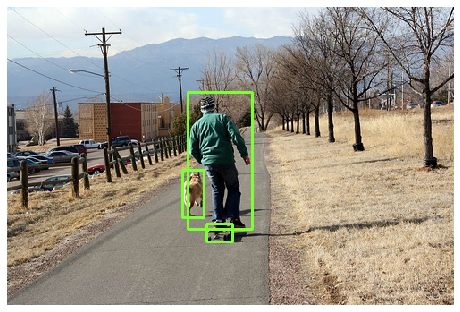

In [ ]:
image_array = cv2.imread(img_file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

for ann_bbox in anns_bbox:
    start_x = ann_bbox[0]
    start_y = ann_bbox[1]
    right = ann_bbox[0] + ann_bbox[2]
    bottom = ann_bbox[1] + ann_bbox[3]
    cv2.rectangle(image_array, (int(start_x), int(start_y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)

plt.figure(figsize=(8, 10))
plt.imshow(image_array)
plt.axis('off')

#### bounding box 위에 category명을 시각화

In [ ]:
cats = coco.loadCats([ann['category_id'] for ann in anns])
print(cats)

# category id별로 category 명을 추출
category_names = [cat['name'] for cat in cats]
print(category_names)

[{'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory': 'sports', 'id': 41, 'name': 'skateboard'}, {'supercategory': 'person', 'id': 1, 'name': 'person'}]
['dog', 'skateboard', 'person']


In [ ]:
[ann['category_id'] for ann in anns]

[18, 41, 1]

{'supercategory': 'animal', 'id': 18, 'name': 'dog'}
{'supercategory': 'sports', 'id': 41, 'name': 'skateboard'}
{'supercategory': 'person', 'id': 1, 'name': 'person'}


(-0.5, 499.5, 333.5, -0.5)

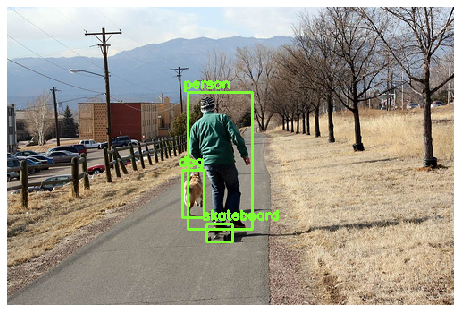

In [ ]:
image_array = cv2.imread(img_file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

for ann in anns:
    ann_bbox = ann['bbox']
    ann_catogory_id = ann['category_id']

    # bounding box를 시각화
    start_x = ann_bbox[0]
    start_y = ann_bbox[1]
    right = ann_bbox[0] + ann_bbox[2]
    bottom = ann_bbox[1] + ann_bbox[3]
    cv2.rectangle(image_array, (int(start_x), int(start_y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)

    # category명을 시각화
    category = coco.loadCats(ann_catogory_id)[0]
    print(category)
    category_name = category['name']
    cv2.putText(image_array, category_name, (int(start_x - 5), int(start_y - 5)),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (125, 255, 51), 2)


plt.figure(figsize=(8, 10))
plt.imshow(image_array)
plt.axis('off')